<a href="https://colab.research.google.com/github/Sulaimanibrahim06/IMDb-Sentiment-Analysis/blob/main/sentimentanalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMDb Sentiment Analysis

##Imports And Setup

In [32]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
import nltk

##Data Cleaning

In [3]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()                          # lowercase
    text = re.sub(r"<br\s*/?>", " ", text)            # remove <br> tags
    text = re.sub(r"[^a-z\s]", " ", text)             # remove punctuation/numbers
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Dataset

In [11]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/IMDB Dataset.csv")
df["cleaned"] = df["review"].apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

##Test Train Split

In [16]:
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##Vectorizer

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

##Function to evaluate the Model and also to Display Accuracy and Required Graphs

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test, name, use_proba=True):
    """Train, evaluate, and visualize results for a model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, "classes_") else [0,1])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Curve
    if use_proba:
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation")
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    return acc, prec, rec, f1

results={}

##Logistic Regression


=== Logistic Regression ===
Accuracy : 0.8898
Precision: 0.8837
Recall   : 0.8978
F1-score : 0.8907


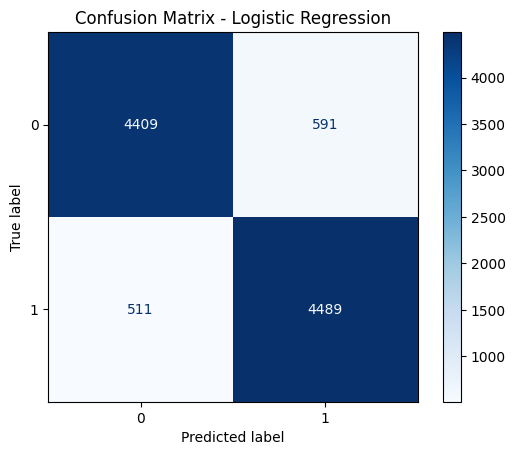

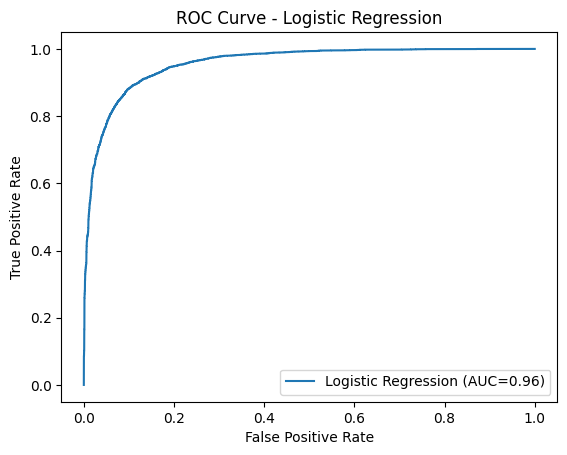

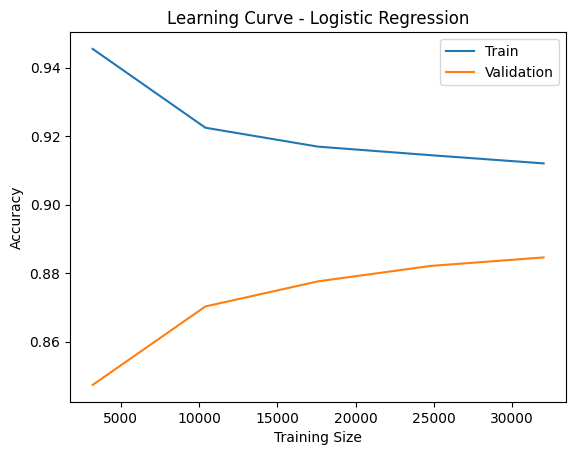

In [28]:
log_reg = LogisticRegression(max_iter=1000)
results["Logistic Regression"] = evaluate_model(log_reg, X_train_vec, X_test_vec, y_train, y_test, "Logistic Regression")

##Naive Bayes


=== Naive Bayes ===
Accuracy : 0.8531
Precision: 0.8480
Recall   : 0.8604
F1-score : 0.8542


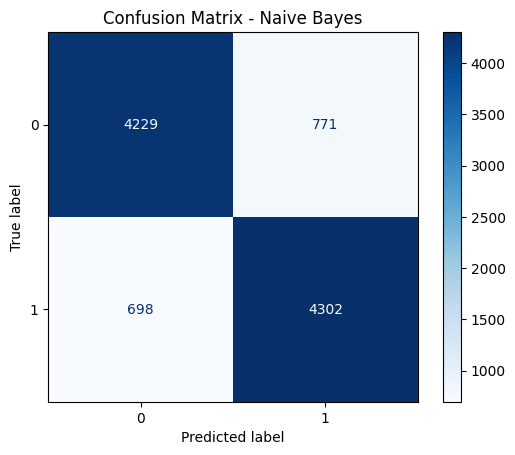

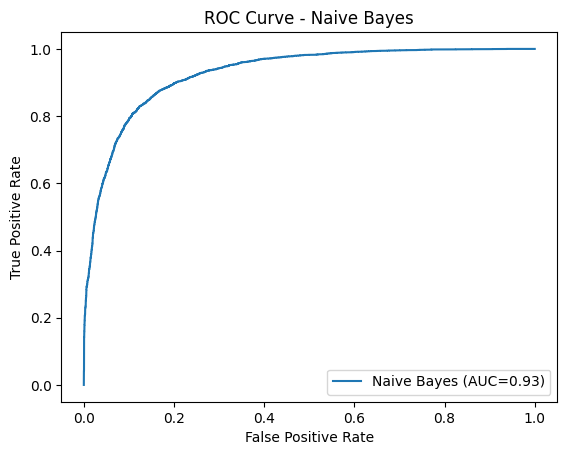

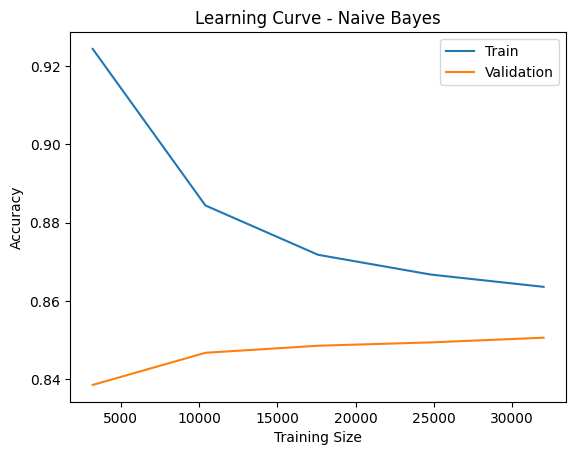

In [33]:
nb = MultinomialNB()
results["Naive Bayes"] = evaluate_model(nb, X_train_vec, X_test_vec, y_train, y_test, "Naive Bayes")


##SVM


=== SVM ===
Accuracy : 0.8812
Precision: 0.8761
Recall   : 0.8880
F1-score : 0.8820


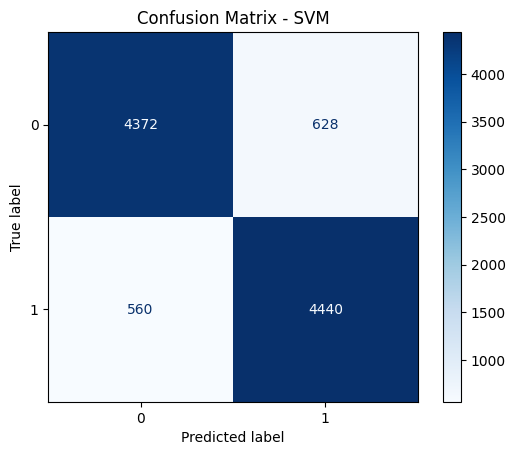

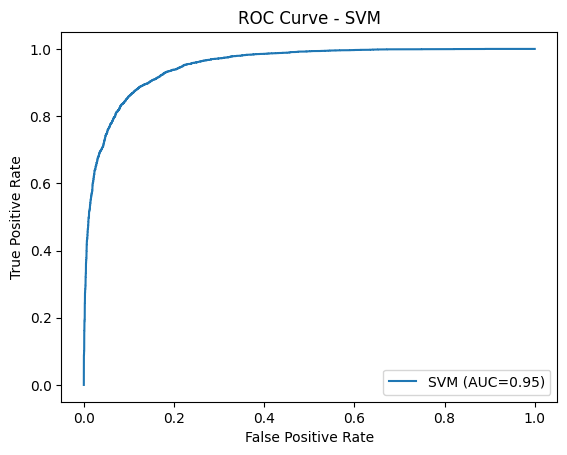

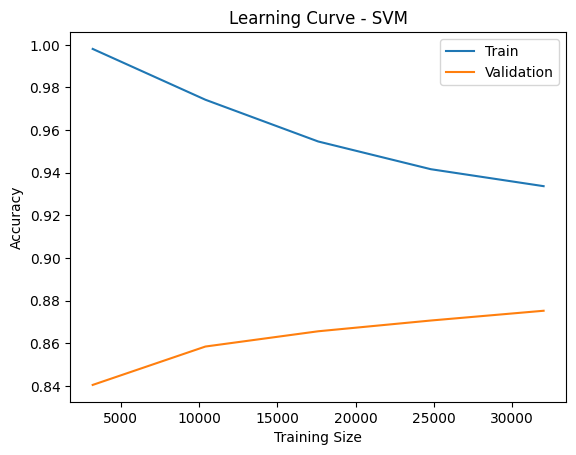

In [29]:
svm = LinearSVC()
results["SVM"] = evaluate_model(svm, X_train_vec, X_test_vec, y_train, y_test, "SVM", use_proba=False)

##Random Forest


=== Random Forest ===
Accuracy : 0.8568
Precision: 0.8654
Recall   : 0.8450
F1-score : 0.8551


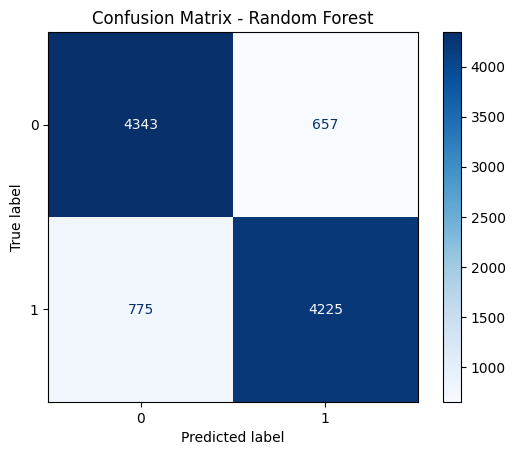

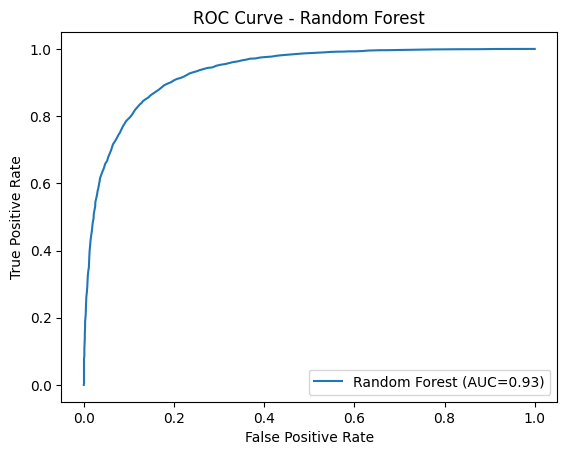

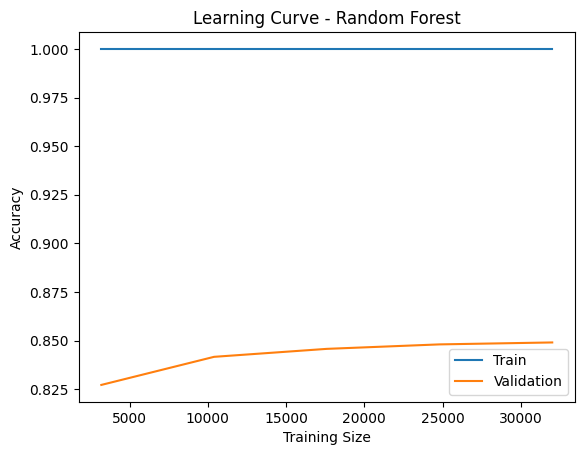

In [31]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
results["Random Forest"] = evaluate_model(rf, X_train_vec, X_test_vec, y_train, y_test, "Random Forest")

## Deep Learning Model (LSTM)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 345s 681ms/step - accuracy: 0.5111 - loss: 0.6923 - val_accuracy: 0.5126 - val_loss: 0.6944
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 381s 679ms/step - accuracy: 0.5622 - loss: 0.6704 - val_accuracy: 0.5748 - val_loss: 0.6749
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 389s 693ms/step - accuracy: 0.6072 - loss: 0.6453 - val_accuracy: 0.6000 - val_loss: 0.6408
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 351s 702ms/step - accuracy: 0.7163 - loss: 0.5325 - val_accuracy: 0.8611 - val_loss: 0.3292
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 346s 693ms/step - accuracy: 0.8911 - loss: 0.2862 - val_accuracy: 0.8729 - val_loss: 0.3031
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5000
           1       0.87      0.86      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0

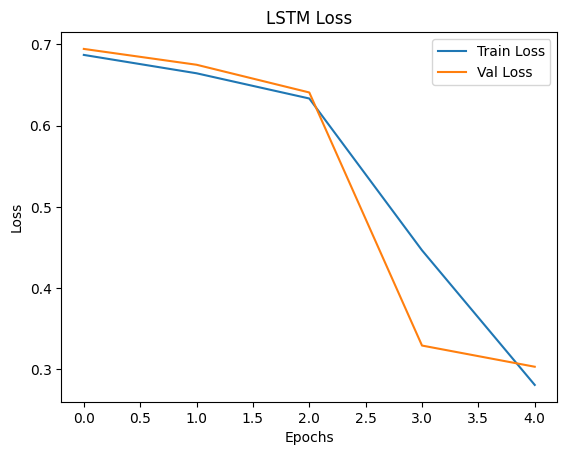

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix


# Preprocessing
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


# LSTM Model

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("LSTM Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

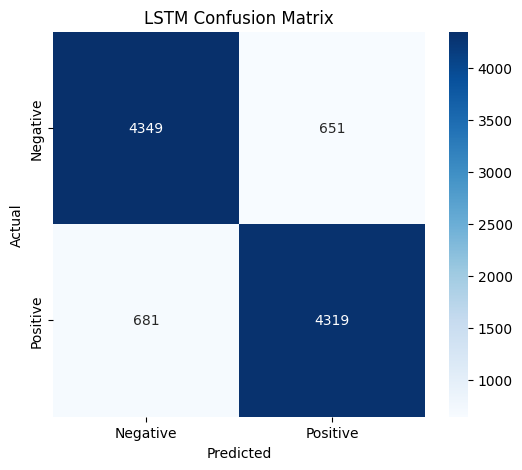

In [45]:
def plot_confusion_matrix(y_true, y_pred, classes, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title(title)
    plt.show()
plot_confusion_matrix(y_test, y_pred, classes=["Negative", "Positive"], title="LSTM Confusion Matrix")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results["LSTM"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1
}


##Final Results of the 5 Models that I have trained


📊 Model Comparison:

           Logistic Regression       SVM  Random Forest  Naive Bayes      LSTM
Accuracy              0.889800  0.881200       0.856800     0.853100  0.866800
Precision             0.883661  0.876085       0.865424     0.848019  0.869014
Recall                0.897800  0.888000       0.845000     0.860400  0.863800
F1 Score              0.890675  0.882002       0.855090     0.854165       NaN


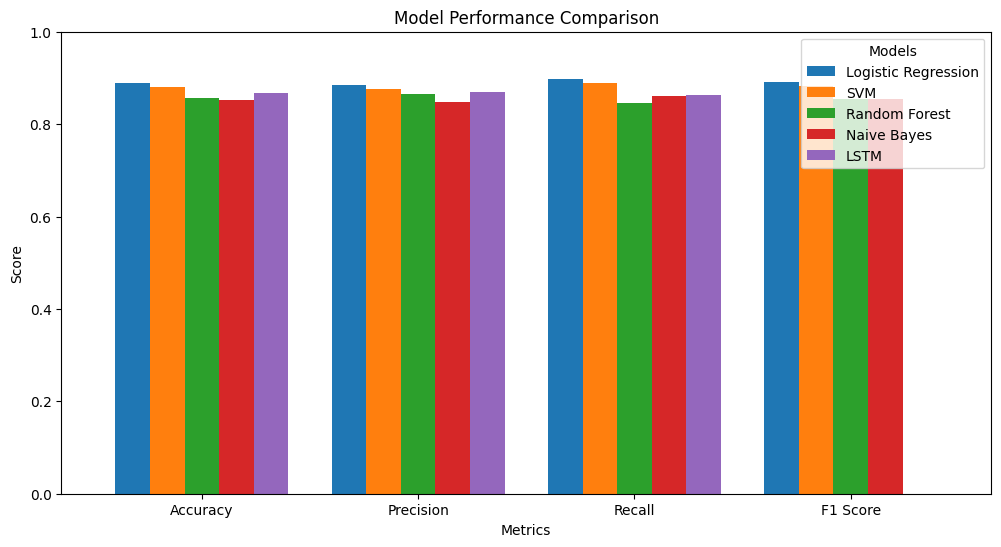

In [47]:
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"])

print("\n📊 Model Comparison:\n")
print(results_df)

# Plot — metrics on X-axis, models as legend
results_df.plot(
    kind="bar",
    figsize=(12, 6),
    width=0.8
)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.xlabel("Metrics")
plt.legend(title="Models")
plt.show()